# Group 3 - Assigment 3

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("data/soc-redditHyperlinks-body.tsv", sep='\t')
data.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


In [3]:
data.shape

(286561, 6)

In [4]:
data.dtypes

SOURCE_SUBREDDIT    object
TARGET_SUBREDDIT    object
POST_ID             object
TIMESTAMP           object
LINK_SENTIMENT       int64
PROPERTIES          object
dtype: object

In [5]:
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'], format="%Y-%m-%d %H:%M:%S")
data.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


In [6]:
data.isnull().any()

SOURCE_SUBREDDIT    False
TARGET_SUBREDDIT    False
POST_ID             False
TIMESTAMP           False
LINK_SENTIMENT      False
PROPERTIES          False
dtype: bool

In [7]:
data.columns

Index(['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', 'POST_ID', 'TIMESTAMP',
       'LINK_SENTIMENT', 'PROPERTIES'],
      dtype='object')

In [8]:
uniqueSource = data['SOURCE_SUBREDDIT'].unique()
uniqueSource.size

27863

In [9]:
uniqueTarget = data['TARGET_SUBREDDIT'].unique()
uniqueTarget.size

20606

### Top 5 source subreddit

In [10]:
top5Source = data.groupby('SOURCE_SUBREDDIT')['POST_ID'].count().reset_index(name='count').sort_values(by='count',ascending=False).head(5)
top5Source

,SOURCE_SUBREDDIT,count
23227,subredditdrama,4665
4449,circlebroke,2358
21675,shitliberalssay,1968
17404,outoftheloop,1958
5225,copypasta,1824


### Top 5 target subreddit

In [11]:
top5Target = data.groupby('TARGET_SUBREDDIT')['POST_ID'].count().reset_index(name='count').sort_values(by='count',ascending=False).head(5)
top5Target

,TARGET_SUBREDDIT,count
1287,askreddit,7329
8618,iama,3694
13557,pics,2779
20287,writingprompts,2490
19539,videos,2446


Source to positve target:  (265491, 6)
Source to negative target:  (21070, 6)
Negative % =  7.352710243194294


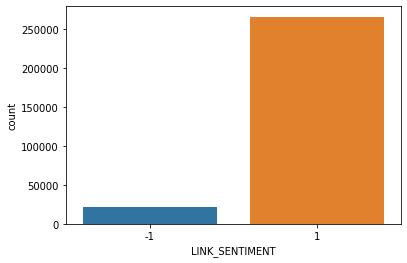

In [12]:
towardPositive = data[data.LINK_SENTIMENT==1]
towardNegative = data[data.LINK_SENTIMENT==-1]
print("Source to positve target: ", towardPositive.shape)
print("Source to negative target: ", towardNegative.shape)
print("Negative % = ", towardNegative.shape[0]*100/(towardPositive.shape[0] + towardNegative.shape[0]))
sns.countplot(x='LINK_SENTIMENT', data=data)

### Convert the data into graph model 
- vertex: subreddits
- edge: source and target subreddits

### Find clustering coefficient(global/local)
- Adjacency list
- Sort-Merge algorithm to find triangles and triads

### Find strongly connected components (similar subreddit)
- When there is a loop among all the nodes in a component
- Show the subreddits of same cluster

### Finding K-Core
- How sparse the graph is?

### Analysis of subreddit based on time
- When did this subreddit(i.e. askreddit) become popular?

### Is there any relationship between source and target subreddit when the LINK_SENTIMENT is negative?